In [1]:
#^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
# Name: Jonah Zembower
# Date: March 10, 2025
# Project: EY 2025 Data Science Challenge
# ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

# Load Libraries and Data:

Importing the necessary libraries:

In [2]:
# Supress Warnings 
import warnings
warnings.filterwarnings('ignore')

# Import common libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# For the geodataframe
import geopandas as gpd
from shapely import wkt
from scipy.spatial import cKDTree

# Neural Network
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import keras_tuner as kf

Importing the necessary datasets:

In [14]:
# Training Data:
training_data = pd.read_csv("C:\\Users\\jrzem\\OneDrive\\Desktop\\EY Dataset\\Training_data_uhi_index.csv")

In [15]:
# Satellite Data:
all_bands_granular = pd.read_csv("C:\\Users\\jrzem\\OneDrive\\Desktop\\EY Dataset\\Satellite Data\\all_bands_granular.csv")
all_bands_noisy_proximity = pd.read_csv("C:\\Users\\jrzem\\OneDrive\\Desktop\\EY Dataset\\Satellite Data\\all_bands_noisy_proximity.csv")
all_bands_proximity_noisy = pd.read_csv("C:\\Users\\jrzem\\OneDrive\\Desktop\\EY Dataset\\Satellite Data\\all_bands_proximity_noisy.csv")
all_bands_proximity_rounded_3 = pd.read_csv("C:\\Users\\jrzem\\OneDrive\\Desktop\\EY Dataset\\Satellite Data\\all_bands_proximity_rounded_3.csv")
all_bands_proximity_rounded_3_mapped = pd.read_csv("C:\\Users\\jrzem\\OneDrive\\Desktop\\EY Dataset\\Satellite Data\\all_bands_proximity_rounded_3_mapped.csv")
indices_granular = pd.read_csv("C:\\Users\\jrzem\\OneDrive\\Desktop\\EY Dataset\\Satellite Data\\indices_granular.csv")
landsat_thermal_granular = pd.read_csv("C:\\Users\\jrzem\\OneDrive\\Desktop\\EY Dataset\\Satellite Data\\landsat_thermal_granular.csv")
noisy_long_lat_uhi = pd.read_csv("C:\\Users\\jrzem\\OneDrive\\Desktop\\EY Dataset\\Satellite Data\\noisy_long_lat_uhi.csv")

In [16]:
# Elevation Data:
building_elevation_granular = pd.read_csv("C:\\Users\\jrzem\\OneDrive\\Desktop\\EY Dataset\\Elevation\\building_elevation_granular.csv")
building_elevation_nyc = pd.read_csv("C:\\Users\\jrzem\\OneDrive\\Desktop\\EY Dataset\\Elevation\\building_elevation_nyc.csv")
building_elevation_proximity = pd.read_csv("C:\\Users\\jrzem\\OneDrive\\Desktop\\EY Dataset\\Elevation\\building_elevation_proximity.csv")
all_elevation_nyc = pd.read_csv("C:\\Users\\jrzem\OneDrive\\Desktop\\EY Dataset\\Elevation\\all_elevation_nyc.csv")

In [17]:
# UHI Data:
proximity_uhi_train_long_lat = pd.read_csv("C:\\Users\\jrzem\\OneDrive\\Desktop\\EY Dataset\\UHI\\proximity_uhi_train_long_lat.csv")
rounded_mapped_uhi_train = pd.read_csv("C:\\Users\\jrzem\\OneDrive\\Desktop\\EY Dataset\\UHI\\rounded_mapped_uhi_train.csv")
rounded_uhi_train = pd.read_csv("C:\\Users\\jrzem\\OneDrive\\Desktop\\EY Dataset\\UHI\\rounded_uhi_train.csv")

In [9]:
# Load the test data
test_data = pd.read_csv("C:\\Users\\jrzem\\OneDrive\\Desktop\\EY Dataset\\Submission_template.csv")

# EDA:

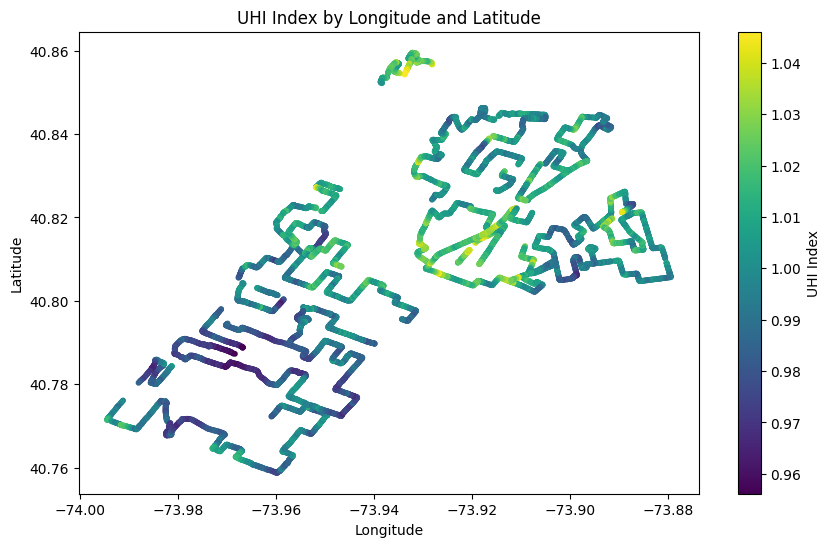

In [12]:
plt.figure(figsize=(10, 6))
plt.scatter(all_bands_proximity_rounded_3_mapped['Longitude'], all_bands_proximity_rounded_3_mapped['Latitude'], c=all_bands_proximity_rounded_3_mapped['UHI Index'], cmap='viridis', s=10)
plt.colorbar(label='UHI Index')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('UHI Index by Longitude and Latitude')
plt.show()

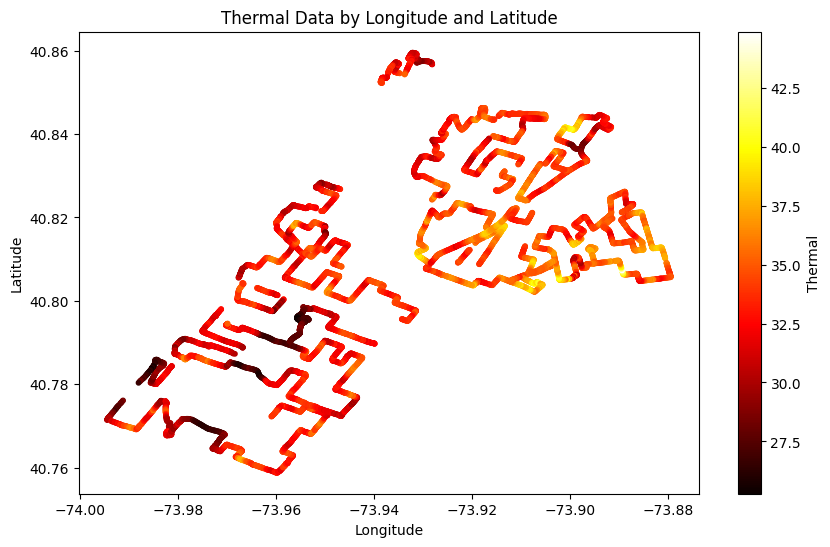

In [13]:
plt.figure(figsize=(10, 6))
plt.scatter(landsat_thermal_granular['Longitude'], landsat_thermal_granular['Latitude'], c=landsat_thermal_granular['Thermal'], cmap='hot', s=10)
plt.colorbar(label='Thermal')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Thermal Data by Longitude and Latitude')
plt.show()

# Neural Network Models:

1. The first model we will perform is the all bands, 3 decimal place. This model performed best in our random forest regressor method.
2. The second model we will perform is certain bands with the elevation data.
3. The next model we will perform is the bands, elevation, and socioeconomic data. 

### All Bands, 3 Decimal Place:

In [ ]:
# Load your dataset
df = all_bands_proximity_rounded_3_mapped.copy()

# Feature selection
X = df.drop(columns=['Longitude', 'Latitude', 'UHI Index', 'Unnamed: 0', 'datetime'])
y = df['UHI Index']

# Train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [60]:
from tensorflow.keras.callbacks import EarlyStopping
# Define the model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),  # Input layer
    Dense(128, activation='relu'),  # Hidden layer
    Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Add EarlyStopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32,
                    validation_data=(X_test, y_test), callbacks=[early_stopping])

# Evaluate the model
model.evaluate(X_test, y_test)

Epoch 1/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.2742 - mae: 0.4254 - val_loss: 0.0297 - val_mae: 0.1399
Epoch 2/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0241 - mae: 0.1199 - val_loss: 0.0058 - val_mae: 0.0617
Epoch 3/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0046 - mae: 0.0532 - val_loss: 0.0017 - val_mae: 0.0307
Epoch 4/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0016 - mae: 0.0310 - val_loss: 9.5322e-04 - val_mae: 0.0234
Epoch 5/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8.9320e-04 - mae: 0.0233 - val_loss: 6.9920e-04 - val_mae: 0.0202
Epoch 6/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.2824e-04 - mae: 0.0209 - val_loss: 9.3424e-04 - val_mae: 0.0239
Epoch 7/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6.4504e-04 - mae: 0.0198 - val_loss: 7.0273e-04 - val_mae: 0.0203
Epoch 8/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6.7105e-04 - mae: 0.0200 - val_loss: 7.2852e-04 - val_mae: 0.0213
Epoch 9/50
71/71 ━━━━━━━━━━━━━━━━━━━

[0.00023681082529947162, 0.01195833645761013]

In [61]:
import keras_tuner as kt
def build_model(hp):
    model = Sequential()
    model.add(Dense(units=hp.Int('units', min_value=32, max_value=512, step=32),
                    activation='relu', input_shape=(X_train.shape[1],)))
    for i in range(hp.Int('num_layers', 1, 3)):
        model.add(Dense(units=hp.Int('units_' + str(i), min_value=32, max_value=512, step=32),
                        activation='relu'))
    model.add(Dense(1))  # Output layer
    
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

# Set up tuner
tuner = kt.RandomSearch(build_model,
                        objective='val_mae',
                        max_trials=10,
                        executions_per_trial=3,
                        directory='my_dir',
                        project_name='hyperparameter_tuning')

# Run the hyperparameter search
tuner.search(X_train, y_train, epochs=50, validation_data=(X_test, y_test))

# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
optimal_units = best_hps.get('units')

print(f"The optimal number of units is {optimal_units}.")


Reloading Tuner from my_dir\hyperparameter_tuning\tuner0.json
The optimal number of units is 128.


Epoch 1/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.2300 - mae: 0.3681 - val_loss: 0.0081 - val_mae: 0.0705
Epoch 2/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0051 - mae: 0.0539 - val_loss: 0.0012 - val_mae: 0.0274
Epoch 3/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8.6827e-04 - mae: 0.0227 - val_loss: 4.9247e-04 - val_mae: 0.0174
Epoch 4/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.2907e-04 - mae: 0.0181 - val_loss: 4.6179e-04 - val_mae: 0.0169
Epoch 5/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.9523e-04 - mae: 0.0173 - val_loss: 3.7463e-04 - val_mae: 0.0154
Epoch 6/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.4603e-04 - mae: 0.0146 - val_loss: 3.5713e-04 - val_mae: 0.0150
Epoch 7/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.3448e-04 - mae: 0.0144 - val_loss: 3.5206e-04 - val_mae: 0.0149
Epoch 8/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.2635e-04 - mae: 0.0141 - val_loss: 5.6419e-04 - val_mae: 0.0196
Epoch 9/50
71/71 ━━━━━━━

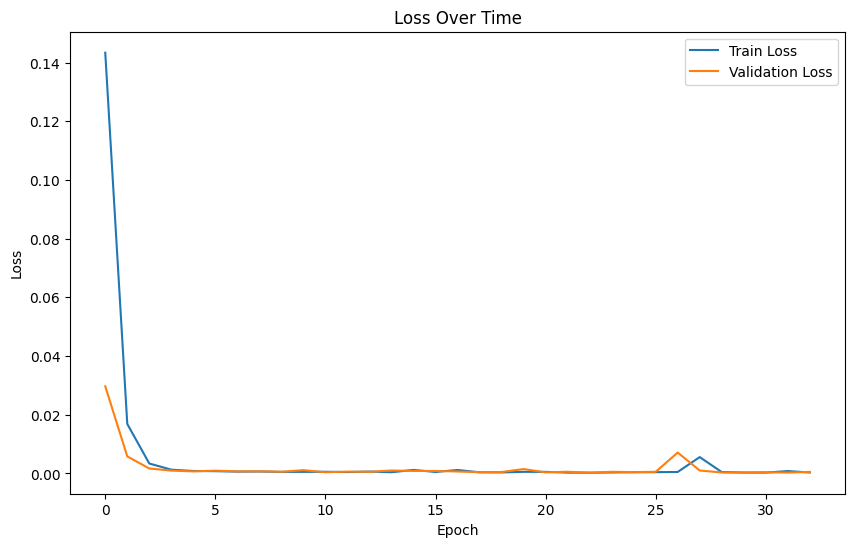

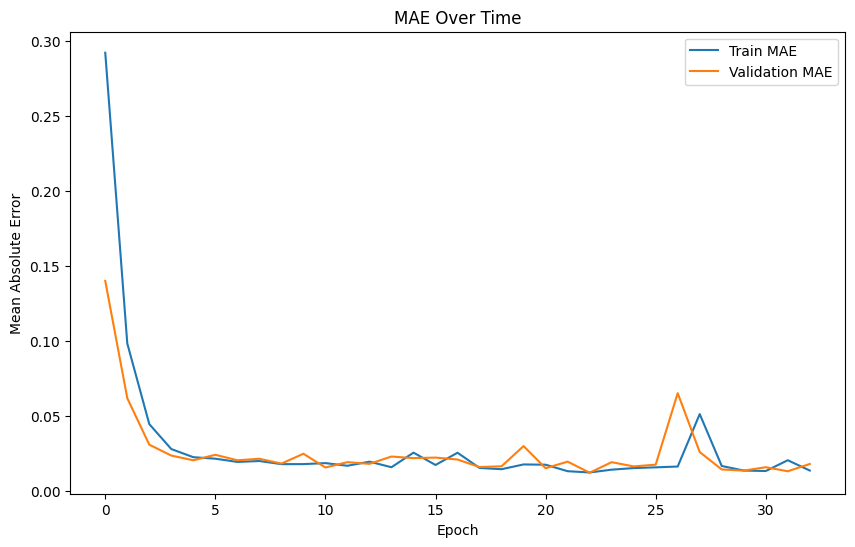

In [62]:
# Train model with optimal hyperparameters
best_model = tuner.hypermodel.build(best_hps)
best_model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))

# Plot training loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Over Time')
plt.show()

# Plot MAE
plt.figure(figsize=(10, 6))
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.title('MAE Over Time')
plt.show()


In [63]:
def add_nearest_data(uhi_data: pd.DataFrame, data_to_map: pd.DataFrame) -> pd.DataFrame:
    """
    Adds nearest spectral data to submission dataset using KDTree.

    Parameters:
        uhi_data (pd.DataFrame): DataFrame containing submission locations (Latitude, Longitude).
        data_to_map (pd.DataFrame): DataFrame containing spectral band values.

    Returns:
        pd.DataFrame: Submission dataset with matched spectral data.
    """
    # Extract coordinates
    elevation_coords = np.array(list(zip(data_to_map["Latitude"], data_to_map["Longitude"])))
    uhi_coords = np.array(list(zip(uhi_data["Latitude"], uhi_data["Longitude"])))
    
    # Build KDTree
    tree = cKDTree(elevation_coords)
    
    # Find nearest neighbors
    _, indices = tree.query(uhi_coords)
    
    # Add matched spectral data
    uhi_data = uhi_data.copy()
    for col in data_to_map.drop(columns=['Longitude', 'Latitude']):
        uhi_data[col] = data_to_map.iloc[indices][col].values
    
    return uhi_data

# Match spectral features for submission data
submission_all_bands = add_nearest_data(test_data, all_bands_proximity_rounded_3)


In [64]:
# Define spectral features (excluding Longitude, Latitude, and UHI Index)
spectral_features = [col for col in X.columns if col not in ["Longitude", "Latitude"]]

# Ensure spectral features match between training and submission datasets
spectral_features

['BO1', 'BO2', 'BO3', 'BO4', 'BO5', 'BO6', 'BO7', 'BO8', 'B8A', 'B11', 'B12']

33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
281/281 ━━━━━━━━━━━━━━━━━━━━ 0s 484us/step


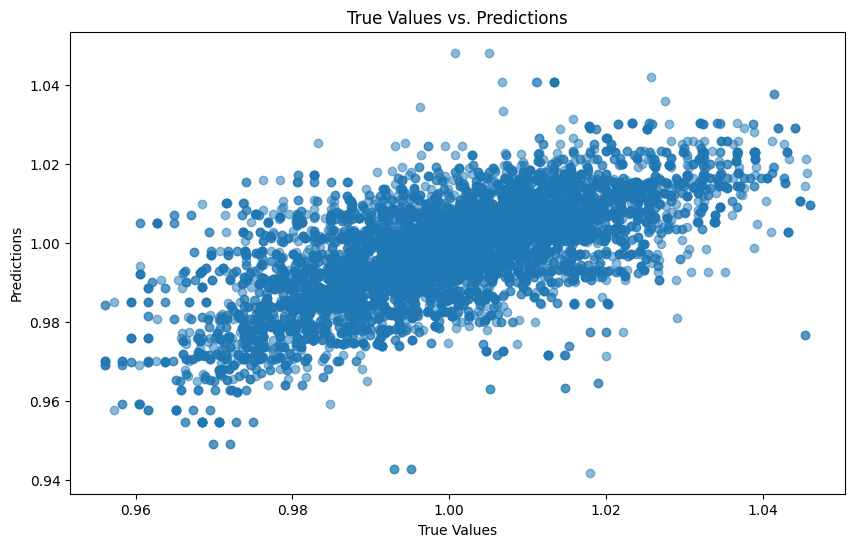

281/281 ━━━━━━━━━━━━━━━━━━━━ 0s 565us/step


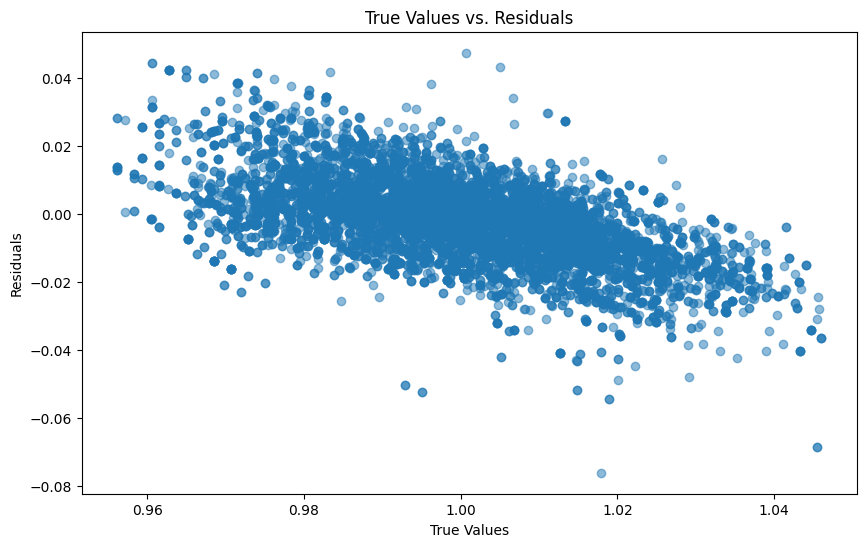

In [65]:
# Ensure submission data only contains the features used for training
x_submission_test = submission_all_bands[spectral_features]  # Keep only the 11 spectral features

# Ensure the order of features matches the training data
x_submission_test = x_submission_test[X.columns]

# Standardize the submission dataset using the same scaler
x_submission_test_scaled = scaler.transform(x_submission_test)

# Predict UHI Index
submission_predictions = best_model.predict(x_submission_test_scaled)

# Add predictions to submission DataFrame
submission_all_bands["UHI Index"] = submission_predictions.flatten()

# Plot predictions
plt.figure(figsize=(10, 6))
plt.scatter(y_test, best_model.predict(X_test), alpha=0.5)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True Values vs. Predictions')
plt.show()

# Plot residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_test, best_model.predict(X_test).flatten() - y_test, alpha=0.5)
plt.xlabel('True Values')
plt.ylabel('Residuals')
plt.title('True Values vs. Residuals')
plt.show()


In [66]:
# Load the final submission
submission_all_bands_final = submission_all_bands[['Longitude', 'Latitude', 'UHI Index']]
submission_all_bands_final.to_csv("C:\\Users\\jrzem\\Downloads\\submission_all_bands_final.csv", index=False)

This got a 0.77 accuracy for the model.

### All Bands, 3 Decimal Place, With Thermal Data:

I first need to update the csv to include the thermal data:

In [69]:
# Add the landsat_thermal_granular data to the all_bands_proximity_rounded_3_mapped data
all_bands_thermal = all_bands_proximity_rounded_3_mapped.merge(landsat_thermal_granular[['Longitude', 'Latitude', 'Thermal']], on=['Longitude', 'Latitude'])
all_bands_thermal

# Save to CSV
all_bands_thermal.to_csv("C:\\Users\\jrzem\\OneDrive\\Desktop\\EY Dataset\\Satellite Data\\all_bands_thermal.csv", index=False)

# Load dataset
all_bands_thermal = pd.read_csv("C:\\Users\\jrzem\\OneDrive\\Desktop\\EY Dataset\\Satellite Data\\all_bands_thermal.csv")

In [71]:
# Load your dataset
df = all_bands_thermal.copy()

# Feature selection
X = df.drop(columns=['Longitude', 'Latitude', 'UHI Index', 'Unnamed: 0', 'datetime'])
y = df['UHI Index']

# Train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [72]:
# Define the model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),  # Input layer
    Dense(128, activation='relu'),  # Hidden layer
    Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Add EarlyStopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32,
                    validation_data=(X_test, y_test), callbacks=[early_stopping])

# Evaluate the model
model.evaluate(X_test, y_test)

Epoch 1/50
281/281 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1582 - mae: 0.2678 - val_loss: 0.0014 - val_mae: 0.0300
Epoch 2/50
281/281 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0011 - mae: 0.0252 - val_loss: 6.4191e-04 - val_mae: 0.0197
Epoch 3/50
281/281 ━━━━━━━━━━━━━━━━━━━━ 0s 867us/step - loss: 5.8860e-04 - mae: 0.0188 - val_loss: 4.2662e-04 - val_mae: 0.0157
Epoch 4/50
281/281 ━━━━━━━━━━━━━━━━━━━━ 0s 798us/step - loss: 4.4040e-04 - mae: 0.0165 - val_loss: 5.2846e-04 - val_mae: 0.0180
Epoch 5/50
281/281 ━━━━━━━━━━━━━━━━━━━━ 0s 932us/step - loss: 4.1884e-04 - mae: 0.0159 - val_loss: 3.6307e-04 - val_mae: 0.0146
Epoch 6/50
281/281 ━━━━━━━━━━━━━━━━━━━━ 0s 868us/step - loss: 3.7449e-04 - mae: 0.0149 - val_loss: 2.9325e-04 - val_mae: 0.0133
Epoch 7/50
281/281 ━━━━━━━━━━━━━━━━━━━━ 0s 888us/step - loss: 3.9303e-04 - mae: 0.0151 - val_loss: 8.1070e-04 - val_mae: 0.0221
Epoch 8/50
281/281 ━━━━━━━━━━━━━━━━━━━━ 0s 899us/step - loss: 9.1193e-04 - mae: 0.0217 - val_loss: 3.7520e-04 - val_mae:

[9.551760740578175e-05, 0.0076569304801523685]

In [74]:
def build_model(hp):
    model = Sequential()
    model.add(Dense(units=hp.Int('units', min_value=32, max_value=512, step=32),
                    activation='relu', input_shape=(X_train.shape[1],)))
    for i in range(hp.Int('num_layers', 1, 3)):
        model.add(Dense(units=hp.Int('units_' + str(i), min_value=32, max_value=512, step=32),
                        activation='relu'))
    model.add(Dense(1))  # Output layer
    
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

# Set up tuner
tuner = kt.RandomSearch(build_model,
                        objective='val_mae',
                        max_trials=10,
                        executions_per_trial=3,
                        directory='my_dir',
                        project_name='hyperparameter_tuning')

# Run the hyperparameter search
tuner.search(X_train, y_train, epochs=50, validation_data=(X_test, y_test))

# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
optimal_units = best_hps.get('units')

print(f"The optimal number of units is {optimal_units}.")

Trial 10 Complete [00h 00m 43s]
val_mae: 0.006689437044163545

Best val_mae So Far: 0.0061197228108843165
Total elapsed time: 00h 10m 26s
The optimal number of units is 128.


Epoch 1/50
281/281 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0876 - mae: 0.1917 - val_loss: 0.0011 - val_mae: 0.0259
Epoch 2/50
281/281 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8.8717e-04 - mae: 0.0229 - val_loss: 2.9621e-04 - val_mae: 0.0135
Epoch 3/50
281/281 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6.4292e-04 - mae: 0.0192 - val_loss: 5.7605e-04 - val_mae: 0.0191
Epoch 4/50
281/281 ━━━━━━━━━━━━━━━━━━━━ 0s 995us/step - loss: 6.7171e-04 - mae: 0.0184 - val_loss: 3.2206e-04 - val_mae: 0.0144
Epoch 5/50
281/281 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3.8734e-04 - mae: 0.0150 - val_loss: 2.0605e-04 - val_mae: 0.0112
Epoch 6/50
281/281 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3.1196e-04 - mae: 0.0135 - val_loss: 3.0464e-04 - val_mae: 0.0132
Epoch 7/50
281/281 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7.0173e-04 - mae: 0.0192 - val_loss: 1.5903e-04 - val_mae: 0.0098
Epoch 8/50
281/281 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.0328e-04 - mae: 0.0111 - val_loss: 1.5392e-04 - val_mae: 0.009

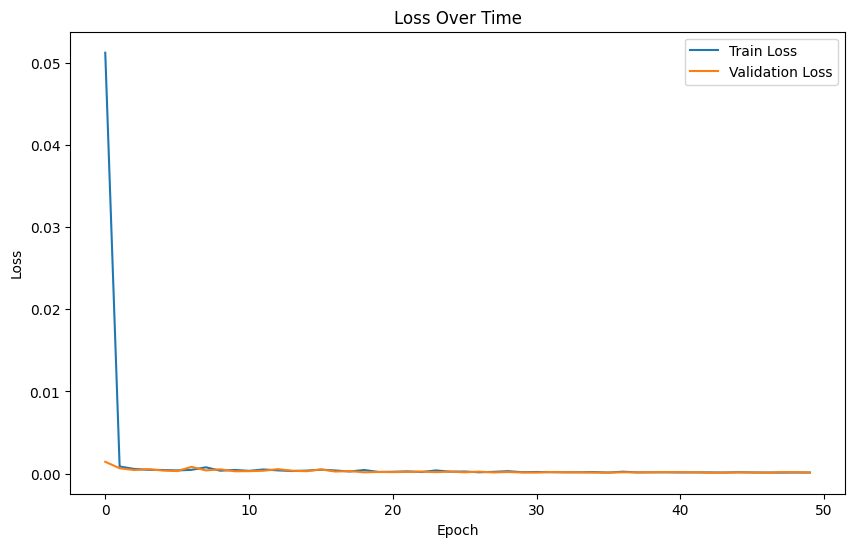

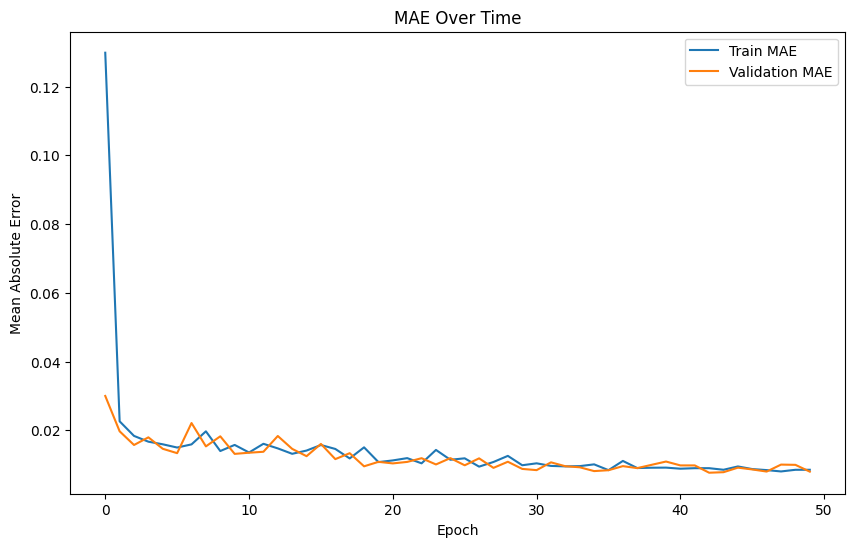

In [75]:
# Train model with optimal hyperparameters
best_model = tuner.hypermodel.build(best_hps)
best_model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))

# Plot training loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Over Time')
plt.show()

# Plot MAE
plt.figure(figsize=(10, 6))
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.title('MAE Over Time')
plt.show()

In [76]:
def add_nearest_data(uhi_data: pd.DataFrame, data_to_map: pd.DataFrame) -> pd.DataFrame:
    """
    Adds nearest spectral data to submission dataset using KDTree.

    Parameters:
        uhi_data (pd.DataFrame): DataFrame containing submission locations (Latitude, Longitude).
        data_to_map (pd.DataFrame): DataFrame containing spectral band values.

    Returns:
        pd.DataFrame: Submission dataset with matched spectral data.
    """
    # Extract coordinates
    elevation_coords = np.array(list(zip(data_to_map["Latitude"], data_to_map["Longitude"])))
    uhi_coords = np.array(list(zip(uhi_data["Latitude"], uhi_data["Longitude"])))
    
    # Build KDTree
    tree = cKDTree(elevation_coords)
    
    # Find nearest neighbors
    _, indices = tree.query(uhi_coords)
    
    # Add matched spectral data
    uhi_data = uhi_data.copy()
    for col in data_to_map.drop(columns=['Longitude', 'Latitude']):
        uhi_data[col] = data_to_map.iloc[indices][col].values
    
    return uhi_data

# Match spectral features for submission data
submission_all_bands_thermal = add_nearest_data(test_data, all_bands_thermal)

In [77]:
# Define spectral features (excluding Longitude, Latitude, and UHI Index)
spectral_features = [col for col in X.columns if col not in ["Longitude", "Latitude"]]

# Ensure spectral features match between training and submission datasets
spectral_features

['BO1',
 'BO2',
 'BO3',
 'BO4',
 'BO5',
 'BO6',
 'BO7',
 'BO8',
 'B8A',
 'B11',
 'B12',
 'Thermal']

33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 614us/step


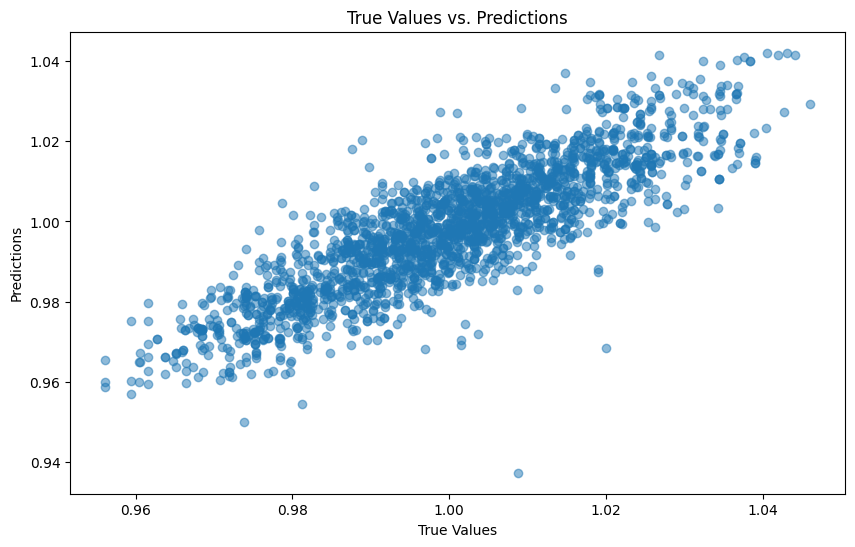

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 586us/step


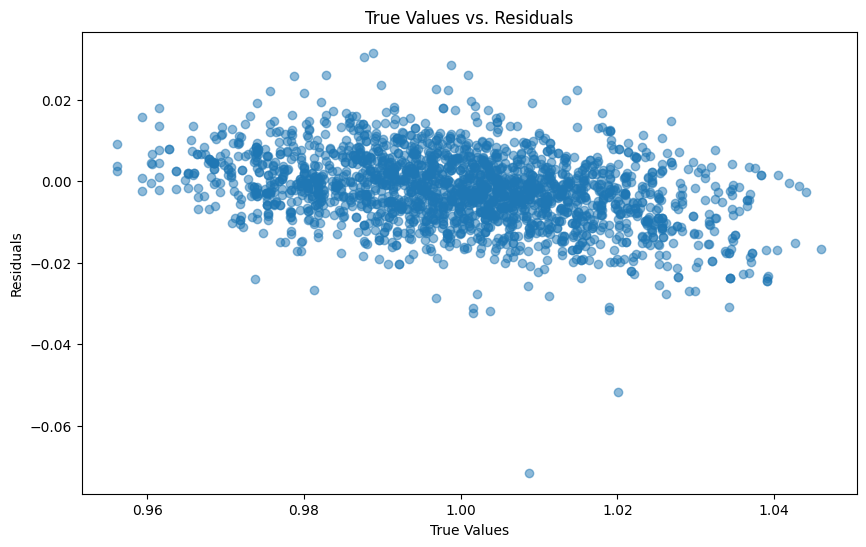

In [78]:
# Ensure submission data only contains the features used for training
x_submission_test = submission_all_bands_thermal[spectral_features]  # Keep only the 12 spectral features

# Ensure the order of features matches the training data
x_submission_test = x_submission_test[X.columns]

# Standardize the submission dataset using the same scaler
x_submission_test_scaled = scaler.transform(x_submission_test)

# Predict UHI Index
submission_predictions = best_model.predict(x_submission_test_scaled)

# Add predictions to submission DataFrame
submission_all_bands_thermal["UHI Index"] = submission_predictions.flatten()

# Plot predictions
plt.figure(figsize=(10, 6))
plt.scatter(y_test, best_model.predict(X_test), alpha=0.5)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True Values vs. Predictions')
plt.show()

# Plot residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_test, best_model.predict(X_test).flatten() - y_test, alpha=0.5)
plt.xlabel('True Values')
plt.ylabel('Residuals')
plt.title('True Values vs. Residuals')
plt.show()


In [79]:
# Load the final submission
submission_all_bands_thermal_final = submission_all_bands_thermal[['Longitude', 'Latitude', 'UHI Index']]
submission_all_bands_thermal_final.to_csv("C:\\Users\\jrzem\\Downloads\\submission_all_bands_thermal_final.csv", index=False)

This got a 0.71 accuracy for the model.

### All Bands, Elevation:

In [106]:
# Add the landsat_thermal_granular data to the all_bands_proximity_rounded_3_mapped data
all_bands_elevation = all_bands_proximity_rounded_3_mapped.merge(building_elevation_proximity[['Longitude', 'Latitude', 'Building Elevation']], on=['Longitude', 'Latitude'])
all_bands_elevation

# Save to CSV
all_bands_elevation.to_csv("C:\\Users\\jrzem\\OneDrive\\Desktop\\EY Dataset\\Satellite Data\\all_bands_elevation.csv", index=False)

# Load dataset
all_bands_elevation = pd.read_csv("C:\\Users\\jrzem\\OneDrive\\Desktop\\EY Dataset\\Satellite Data\\all_bands_elevation.csv")

In [ ]:
# Load your dataset
df = all_bands_elevation.copy()

# Feature selection
X = df.drop(columns=['Longitude', 'Latitude', 'UHI Index', 'Unnamed: 0', 'datetime'])
y = df['UHI Index']

# Train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [108]:
# Define the model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),  # Input layer
    Dense(128, activation='relu'),  # Hidden layer
    Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Add EarlyStopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32,
                    validation_data=(X_test, y_test), callbacks=[early_stopping])

# Evaluate the model
model.evaluate(X_test, y_test)

Epoch 1/50
281/281 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1715 - mae: 0.2799 - val_loss: 7.3171e-04 - val_mae: 0.0204
Epoch 2/50
281/281 ━━━━━━━━━━━━━━━━━━━━ 0s 792us/step - loss: 5.3782e-04 - mae: 0.0176 - val_loss: 3.9104e-04 - val_mae: 0.0156
Epoch 3/50
281/281 ━━━━━━━━━━━━━━━━━━━━ 0s 980us/step - loss: 3.3056e-04 - mae: 0.0142 - val_loss: 2.7924e-04 - val_mae: 0.0129
Epoch 4/50
281/281 ━━━━━━━━━━━━━━━━━━━━ 0s 807us/step - loss: 2.6992e-04 - mae: 0.0129 - val_loss: 2.0942e-04 - val_mae: 0.0114
Epoch 5/50
281/281 ━━━━━━━━━━━━━━━━━━━━ 0s 753us/step - loss: 2.5463e-04 - mae: 0.0124 - val_loss: 2.6497e-04 - val_mae: 0.0129
Epoch 6/50
281/281 ━━━━━━━━━━━━━━━━━━━━ 0s 776us/step - loss: 2.4286e-04 - mae: 0.0122 - val_loss: 2.1496e-04 - val_mae: 0.0116
Epoch 7/50
281/281 ━━━━━━━━━━━━━━━━━━━━ 0s 876us/step - loss: 2.4809e-04 - mae: 0.0123 - val_loss: 1.9615e-04 - val_mae: 0.0111
Epoch 8/50
281/281 ━━━━━━━━━━━━━━━━━━━━ 0s 872us/step - loss: 2.2215e-04 - mae: 0.0117 - val_loss: 1.8109e-04 

[0.00018108826770912856, 0.010609263554215431]

In [109]:
def build_model(hp):
    model = Sequential()
    model.add(Dense(units=hp.Int('units', min_value=32, max_value=512, step=32),
                    activation='relu', input_shape=(X_train.shape[1],)))
    for i in range(hp.Int('num_layers', 1, 3)):
        model.add(Dense(units=hp.Int('units_' + str(i), min_value=32, max_value=512, step=32),
                        activation='relu'))
    model.add(Dense(1))  # Output layer
    
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

# Set up tuner
tuner = kt.RandomSearch(build_model,
                        objective='val_mae',
                        max_trials=10,
                        executions_per_trial=3,
                        directory='my_dir',
                        project_name='hyperparameter_tuning')

# Run the hyperparameter search
tuner.search(X_train, y_train, epochs=50, validation_data=(X_test, y_test))

# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
optimal_units = best_hps.get('units')

print(f"The optimal number of units is {optimal_units}.")

Trial 9 Complete [00h 01m 09s]
val_mae: 0.00985934647421042

Best val_mae So Far: 0.009153420416017374
Total elapsed time: 00h 08m 33s

Search: Running Trial #10

Value             |Best Value So Far |Hyperparameter
480               |128               |units
3                 |3                 |num_layers
192               |64                |units_0
512               |448               |units_1
256               |480               |units_2

Epoch 1/50
281/281 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0936 - mae: 0.1664 - val_loss: 2.2702e-04 - val_mae: 0.0119
Epoch 2/50
281/281 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.6249e-04 - mae: 0.0128 - val_loss: 2.8099e-04 - val_mae: 0.0136
Epoch 3/50
281/281 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.5081e-04 - mae: 0.0127 - val_loss: 2.7066e-04 - val_mae: 0.0129
Epoch 4/50
281/281 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.5931e-04 - mae: 0.0128 - val_loss: 1.7165e-04 - val_mae: 0.0103
Epoch 5/50
281/281 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 

KeyboardInterrupt: 

In [87]:
def add_nearest_data(uhi_data: pd.DataFrame, data_to_map: pd.DataFrame) -> pd.DataFrame:
    """
    Adds nearest spectral data to submission dataset using KDTree.

    Parameters:
        uhi_data (pd.DataFrame): DataFrame containing submission locations (Latitude, Longitude).
        data_to_map (pd.DataFrame): DataFrame containing spectral band values.

    Returns:
        pd.DataFrame: Submission dataset with matched spectral data.
    """
    # Extract coordinates
    elevation_coords = np.array(list(zip(data_to_map["Latitude"], data_to_map["Longitude"])))
    uhi_coords = np.array(list(zip(uhi_data["Latitude"], uhi_data["Longitude"])))
    
    # Build KDTree
    tree = cKDTree(elevation_coords)
    
    # Find nearest neighbors
    _, indices = tree.query(uhi_coords)
    
    # Add matched spectral data
    uhi_data = uhi_data.copy()
    for col in data_to_map.drop(columns=['Longitude', 'Latitude']):
        uhi_data[col] = data_to_map.iloc[indices][col].values
    
    return uhi_data

# Match spectral features for submission data
submission_all_bands_elevation = add_nearest_data(test_data, all_bands_elevation)

In [88]:
# Define spectral features (excluding Longitude, Latitude, and UHI Index)
spectral_features = [col for col in X.columns if col not in ["Longitude", "Latitude"]]

# Ensure spectral features match between training and submission datasets
spectral_features

['BO1',
 'BO2',
 'BO3',
 'BO4',
 'BO5',
 'BO6',
 'BO7',
 'BO8',
 'B8A',
 'B11',
 'B12',
 'Building Elevation']

33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 557us/step


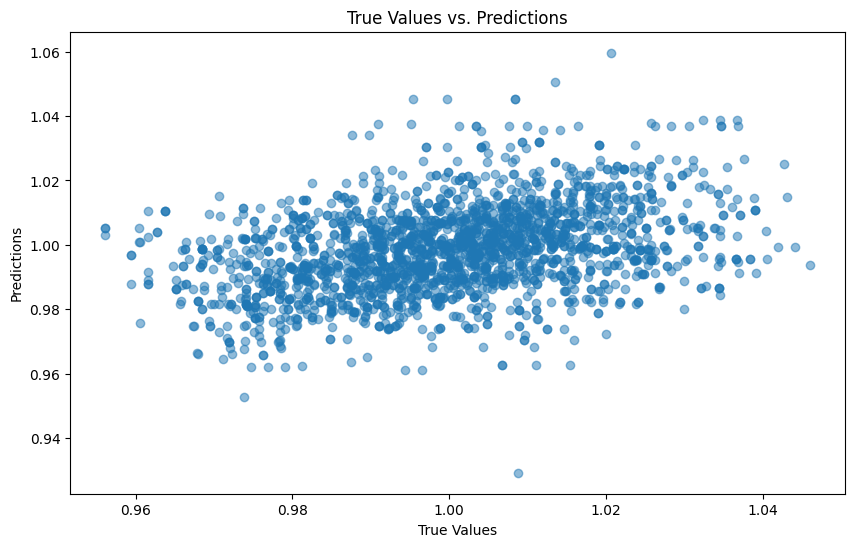

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 586us/step


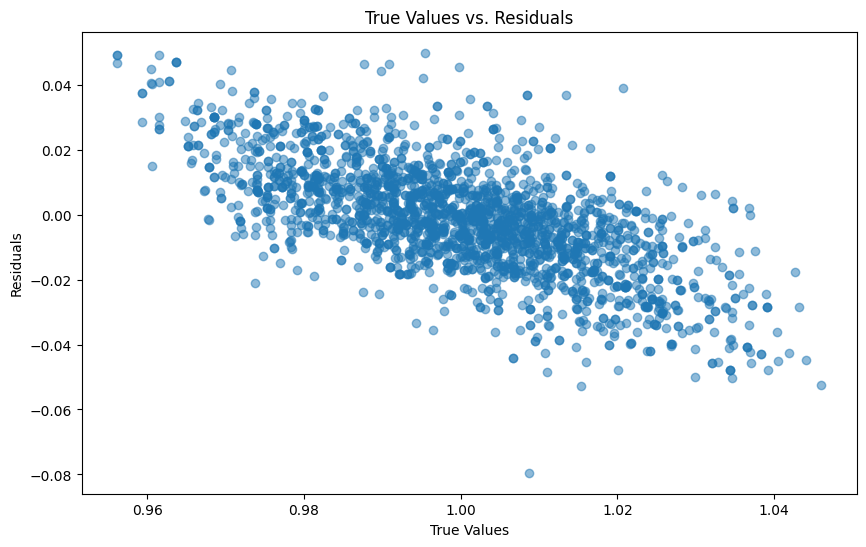

In [89]:
# Ensure submission data only contains the features used for training
x_submission_test = submission_all_bands_elevation[spectral_features]  # Keep only the 12 spectral features

# Ensure the order of features matches the training data
x_submission_test = x_submission_test[X.columns]

# Standardize the submission dataset using the same scaler
x_submission_test_scaled = scaler.transform(x_submission_test)

# Predict UHI Index
submission_predictions = best_model.predict(x_submission_test_scaled)

# Add predictions to submission DataFrame
submission_all_bands_elevation["UHI Index"] = submission_predictions.flatten()

# Plot predictions
plt.figure(figsize=(10, 6))
plt.scatter(y_test, best_model.predict(X_test), alpha=0.5)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True Values vs. Predictions')
plt.show()

# Plot residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_test, best_model.predict(X_test).flatten() - y_test, alpha=0.5)
plt.xlabel('True Values')
plt.ylabel('Residuals')
plt.title('True Values vs. Residuals')
plt.show()

In [90]:
# Load the final submission
submission_all_bands_elevation_final = submission_all_bands_elevation[['Longitude', 'Latitude', 'UHI Index']]
submission_all_bands_elevation_final.to_csv("C:\\Users\\jrzem\\Downloads\\submission_all_bands_elevation_final.csv", index=False)

This got a negative value and was ineffecitve. Maybe try a different method of elevation.

### Bands BO1, BO6, Building Height Only, and Elevation natural:

sentinel (BO1, BO6 proximity) and elevation (building height only and natural elevation proximity)

In [123]:
# Add the landsat_thermal_granular data to the all_bands_proximity_rounded_3_mapped data
all_bands_elevation_2 = all_bands_proximity_rounded_3_mapped.merge(all_elevation_nyc[['Longitude', 'Latitude', 'Building Height Only Proximity','Natural Proximity']], on=['Longitude', 'Latitude'])
all_bands_elevation_2

# Save to CSV
all_bands_elevation_2.to_csv("C:\\Users\\jrzem\\OneDrive\\Desktop\\EY Dataset\\Satellite Data\\all_bands_elevation_2.csv", index=False)

# Load dataset
all_bands_elevation_2 = pd.read_csv("C:\\Users\\jrzem\\OneDrive\\Desktop\\EY Dataset\\Satellite Data\\all_bands_elevation_2.csv")

In [ ]:
# Load your dataset
df = all_bands_elevation_2.copy()

# Feature selection
X = df.drop(columns=['Longitude', 'Latitude', 'UHI Index', 'Unnamed: 0', 'datetime','BO2', 'BO3', 'BO4', 'BO5', 'BO7', 'BO8', 'B8A', 'B11', 'B12'])
y = df['UHI Index']

# Train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [131]:
# Define the model
model = Sequential([
    Dense(96, activation='relu', input_shape=(X_train.shape[1],)),  # Input layer
    Dense(96, activation='relu'),  # Hidden layer
    Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Add EarlyStopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32,
                    validation_data=(X_test, y_test), callbacks=[early_stopping])

# Evaluate the model
model.evaluate(X_test, y_test)

Epoch 1/50
281/281 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1118 - mae: 0.2369 - val_loss: 9.7731e-04 - val_mae: 0.0239
Epoch 2/50
281/281 ━━━━━━━━━━━━━━━━━━━━ 0s 725us/step - loss: 7.3114e-04 - mae: 0.0210 - val_loss: 3.7853e-04 - val_mae: 0.0152
Epoch 3/50
281/281 ━━━━━━━━━━━━━━━━━━━━ 0s 725us/step - loss: 4.0188e-04 - mae: 0.0157 - val_loss: 2.9069e-04 - val_mae: 0.0132
Epoch 4/50
281/281 ━━━━━━━━━━━━━━━━━━━━ 0s 814us/step - loss: 2.8923e-04 - mae: 0.0133 - val_loss: 3.3469e-04 - val_mae: 0.0147
Epoch 5/50
281/281 ━━━━━━━━━━━━━━━━━━━━ 0s 823us/step - loss: 3.1533e-04 - mae: 0.0135 - val_loss: 2.2439e-04 - val_mae: 0.0118
Epoch 6/50
281/281 ━━━━━━━━━━━━━━━━━━━━ 0s 879us/step - loss: 2.3724e-04 - mae: 0.0120 - val_loss: 3.1820e-04 - val_mae: 0.0144
Epoch 7/50
281/281 ━━━━━━━━━━━━━━━━━━━━ 0s 777us/step - loss: 2.6832e-04 - mae: 0.0128 - val_loss: 5.5533e-04 - val_mae: 0.0201
Epoch 8/50
281/281 ━━━━━━━━━━━━━━━━━━━━ 0s 923us/step - loss: 4.9491e-04 - mae: 0.0160 - val_loss: 2.2861e-04 

[0.0001205657608807087, 0.008632000535726547]

In [126]:
def build_model(hp):
    model = Sequential()
    model.add(Dense(units=hp.Int('units', min_value=32, max_value=512, step=32),
                    activation='relu', input_shape=(X_train.shape[1],)))
    for i in range(hp.Int('num_layers', 1, 3)):
        model.add(Dense(units=hp.Int('units_' + str(i), min_value=32, max_value=512, step=32),
                        activation='relu'))
    model.add(Dense(1))  # Output layer
    
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

# Set up tuner
tuner = kt.RandomSearch(build_model,
                        objective='val_mae',
                        max_trials=10,
                        executions_per_trial=3,
                        directory='my_dir',
                        project_name='hyperparameter_tuning')

# Run the hyperparameter search
tuner.search(X_train, y_train, epochs=50, validation_data=(X_test, y_test))

# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
optimal_units = best_hps.get('units')

print(f"The optimal number of units is {optimal_units}.")

Reloading Tuner from my_dir\hyperparameter_tuning\tuner0.json
The optimal number of units is 96.


In [127]:
def add_nearest_data(uhi_data: pd.DataFrame, data_to_map: pd.DataFrame) -> pd.DataFrame:
    """
    Adds nearest spectral data to submission dataset using KDTree.

    Parameters:
        uhi_data (pd.DataFrame): DataFrame containing submission locations (Latitude, Longitude).
        data_to_map (pd.DataFrame): DataFrame containing spectral band values.

    Returns:
        pd.DataFrame: Submission dataset with matched spectral data.
    """
    # Extract coordinates
    elevation_coords = np.array(list(zip(data_to_map["Latitude"], data_to_map["Longitude"])))
    uhi_coords = np.array(list(zip(uhi_data["Latitude"], uhi_data["Longitude"])))
    
    # Build KDTree
    tree = cKDTree(elevation_coords)
    
    # Find nearest neighbors
    _, indices = tree.query(uhi_coords)
    
    # Add matched spectral data
    uhi_data = uhi_data.copy()
    for col in data_to_map.drop(columns=['Longitude', 'Latitude']):
        uhi_data[col] = data_to_map.iloc[indices][col].values
    
    return uhi_data

# Match spectral features for submission data
submission_all_bands_elevation_2 = add_nearest_data(test_data, all_bands_elevation_2)

In [128]:
# Define spectral features (excluding Longitude, Latitude, and UHI Index)
spectral_features = [col for col in X.columns if col not in ['Longitude', 'Latitude','BO2',
 'BO3',
 'BO4',
 'BO5',
 'BO7',
 'BO8',
 'B8A',
 'B11',
 'B12',]]

# Ensure spectral features match between training and submission datasets
spectral_features

['BO1', 'BO6', 'Building Height Only Proximity', 'Natural Proximity']

33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 486us/step


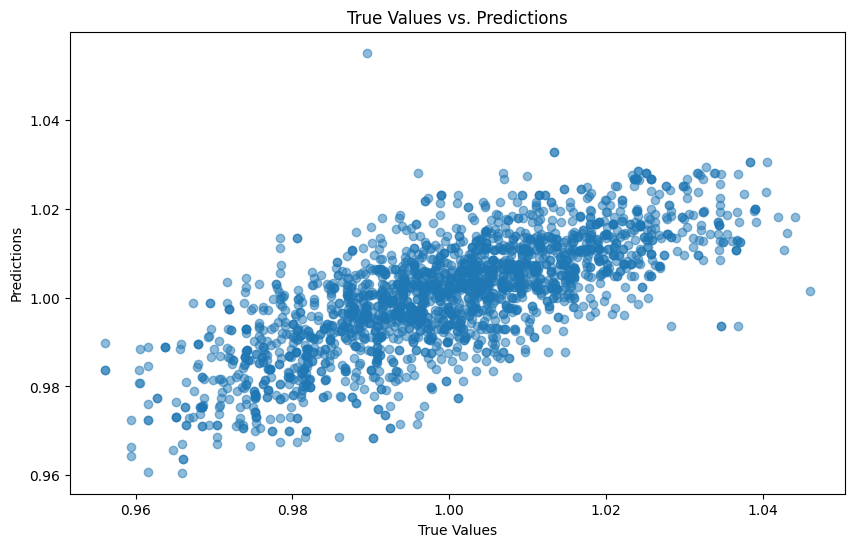

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 507us/step


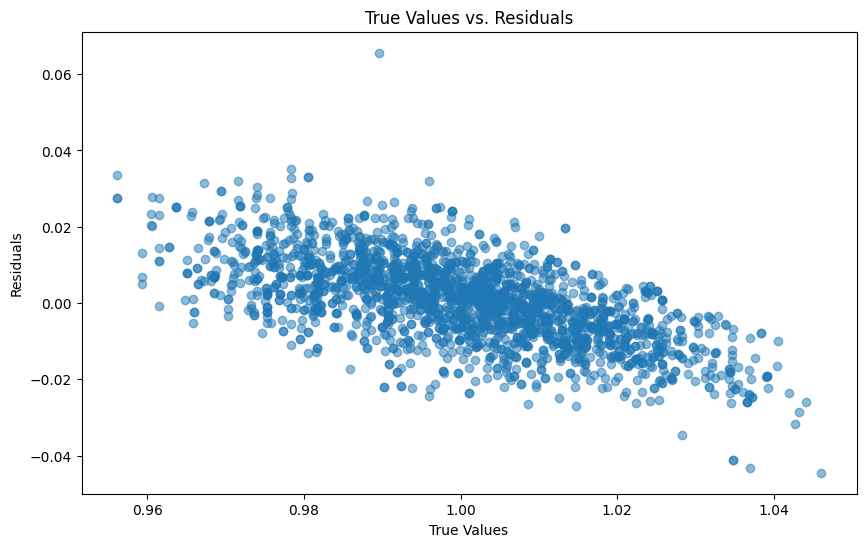

In [132]:
# Ensure submission data only contains the features used for training
x_submission_test = submission_all_bands_elevation_2[spectral_features]  # Keep only the selected spectral features

# Ensure the order of features matches the training data
x_submission_test = x_submission_test[X.columns]

# Standardize the submission dataset using the same scaler
x_submission_test_scaled = scaler.transform(x_submission_test)

# Predict UHI Index
submission_predictions = model.predict(x_submission_test_scaled)

# Add predictions to submission DataFrame
submission_all_bands_elevation_2["UHI Index"] = submission_predictions.flatten()

# Plot predictions
plt.figure(figsize=(10, 6))
plt.scatter(y_test, model.predict(X_test), alpha=0.5)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True Values vs. Predictions')
plt.show()

# Plot residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_test, model.predict(X_test).flatten() - y_test, alpha=0.5)
plt.xlabel('True Values')
plt.ylabel('Residuals')
plt.title('True Values vs. Residuals')
plt.show()

In [133]:
# Load the final submission
submission_all_bands_elevation_final_2 = submission_all_bands_elevation_2[['Longitude', 'Latitude', 'UHI Index']]
submission_all_bands_elevation_final_2.to_csv("C:\\Users\\jrzem\\Downloads\\submission_all_bands_elevation_final_2.csv", index=False)

This got a score of 0.5. This was worse than before, but it showcases that the neural network may not work effectively for this modeling.

# Neural Networks 2:

I am trying a different scaling technique that fits neural networks better:

In [8]:
# Load your dataset
df = all_bands_proximity_rounded_3_mapped.copy()

# Feature selection
X = df.drop(columns=['Longitude', 'Latitude', 'UHI Index', 'Unnamed: 0', 'datetime'])
y = df['UHI Index']

# Train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [9]:
from tensorflow.keras.callbacks import EarlyStopping
# Define the model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),  # Input layer
    Dense(128, activation='relu'),  # Hidden layer
    Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Add EarlyStopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32,
                    validation_data=(X_test, y_test), callbacks=[early_stopping])

# Evaluate the model
model.evaluate(X_test, y_test)

Epoch 1/50
281/281 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 6902.6782 - mae: 46.3213 - val_loss: 26.9007 - val_mae: 3.7969
Epoch 2/50
281/281 ━━━━━━━━━━━━━━━━━━━━ 0s 757us/step - loss: 26.4115 - mae: 3.9033 - val_loss: 16.9572 - val_mae: 3.0523
Epoch 3/50
281/281 ━━━━━━━━━━━━━━━━━━━━ 0s 752us/step - loss: 21.1780 - mae: 3.5647 - val_loss: 36.5648 - val_mae: 5.3097
Epoch 4/50
281/281 ━━━━━━━━━━━━━━━━━━━━ 0s 738us/step - loss: 15.6710 - mae: 3.0740 - val_loss: 12.7985 - val_mae: 2.9778
Epoch 5/50
281/281 ━━━━━━━━━━━━━━━━━━━━ 0s 739us/step - loss: 24.8235 - mae: 3.8119 - val_loss: 4.2759 - val_mae: 1.4473
Epoch 6/50
281/281 ━━━━━━━━━━━━━━━━━━━━ 0s 746us/step - loss: 22.5808 - mae: 3.2689 - val_loss: 19.7654 - val_mae: 2.4824
Epoch 7/50
281/281 ━━━━━━━━━━━━━━━━━━━━ 0s 726us/step - loss: 64.1761 - mae: 6.3575 - val_loss: 3.9903 - val_mae: 1.4469
Epoch 8/50
281/281 ━━━━━━━━━━━━━━━━━━━━ 0s 723us/step - loss: 123.7036 - mae: 5.5192 - val_loss: 5.6636 - val_mae: 1.8262
Epoch 9/50
281/281 ━━━━━━

[0.43261751532554626, 0.41526296734809875]

In [10]:
import keras_tuner as kt
def build_model(hp):
    model = Sequential()
    model.add(Dense(units=hp.Int('units', min_value=32, max_value=512, step=32),
                    activation='relu', input_shape=(X_train.shape[1],)))
    for i in range(hp.Int('num_layers', 1, 3)):
        model.add(Dense(units=hp.Int('units_' + str(i), min_value=32, max_value=512, step=32),
                        activation='relu'))
    model.add(Dense(1))  # Output layer
    
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

# Set up tuner
tuner = kt.RandomSearch(build_model,
                        objective='val_mae',
                        max_trials=10,
                        executions_per_trial=3,
                        directory='my_dir',
                        project_name='hyperparameter_tuning')

# Run the hyperparameter search
tuner.search(X_train, y_train, epochs=50, validation_data=(X_test, y_test))

# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
optimal_units = best_hps.get('units')

print(f"The optimal number of units is {optimal_units}.")

Trial 10 Complete [00h 00m 34s]
val_mae: 0.21525120735168457

Best val_mae So Far: 0.057558733969926834
Total elapsed time: 00h 07m 29s
The optimal number of units is 32.


Epoch 1/50
281/281 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 11944.6621 - mae: 44.5420 - val_loss: 2.6274 - val_mae: 1.2403
Epoch 2/50
281/281 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.7275 - mae: 1.2417 - val_loss: 1.1045 - val_mae: 0.7355
Epoch 3/50
281/281 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9688 - mae: 0.7551 - val_loss: 1.4053 - val_mae: 1.0554
Epoch 4/50
281/281 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5965 - mae: 0.6068 - val_loss: 0.2978 - val_mae: 0.4311
Epoch 5/50
281/281 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5002 - mae: 0.5380 - val_loss: 0.5510 - val_mae: 0.6288
Epoch 6/50
281/281 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0760 - mae: 0.8375 - val_loss: 1.2427 - val_mae: 1.0061
Epoch 7/50
281/281 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3.0764 - mae: 1.1274 - val_loss: 0.3913 - val_mae: 0.5128
Epoch 8/50
281/281 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.4943 - mae: 2.0360 - val_loss: 8.8060 - val_mae: 2.8309
Epoch 9/50
281/281 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

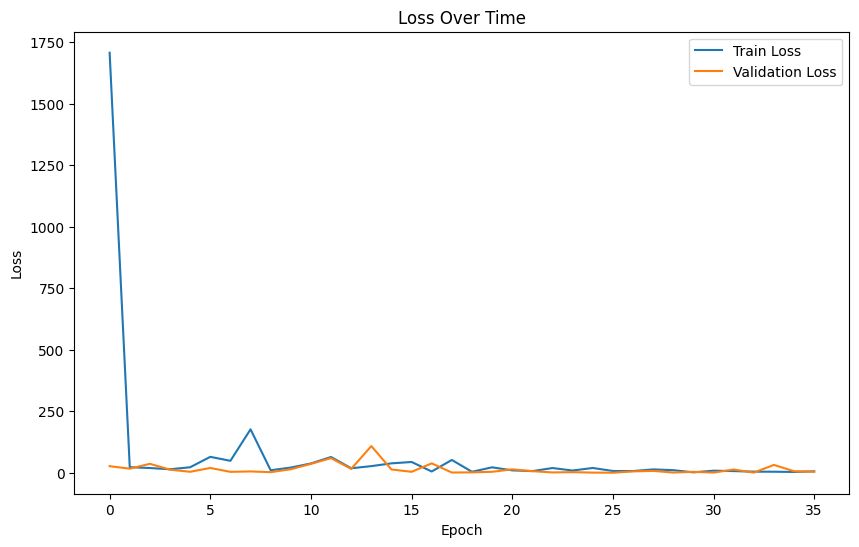

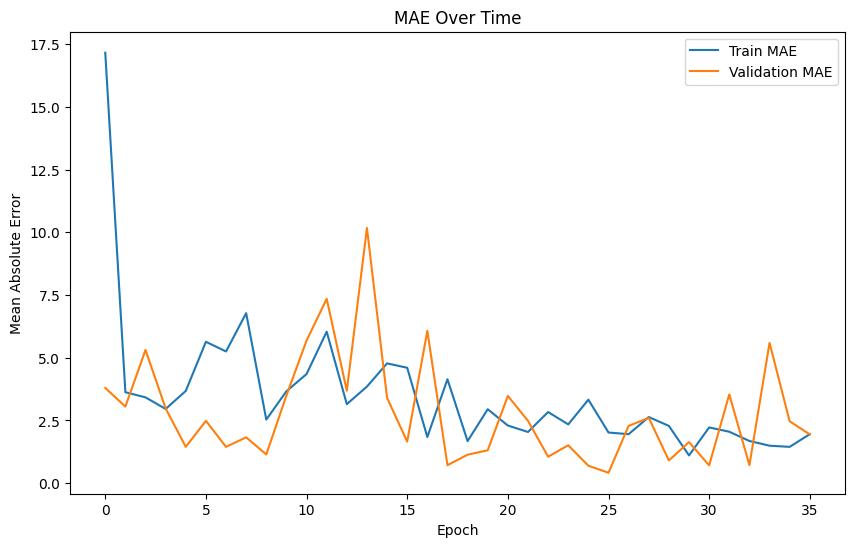

In [11]:
# Train model with optimal hyperparameters
best_model = tuner.hypermodel.build(best_hps)
best_model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))

# Plot training loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Over Time')
plt.show()

# Plot MAE
plt.figure(figsize=(10, 6))
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.title('MAE Over Time')
plt.show()


In [12]:
def add_nearest_data(uhi_data: pd.DataFrame, data_to_map: pd.DataFrame) -> pd.DataFrame:
    """
    Adds nearest spectral data to submission dataset using KDTree.

    Parameters:
        uhi_data (pd.DataFrame): DataFrame containing submission locations (Latitude, Longitude).
        data_to_map (pd.DataFrame): DataFrame containing spectral band values.

    Returns:
        pd.DataFrame: Submission dataset with matched spectral data.
    """
    # Extract coordinates
    elevation_coords = np.array(list(zip(data_to_map["Latitude"], data_to_map["Longitude"])))
    uhi_coords = np.array(list(zip(uhi_data["Latitude"], uhi_data["Longitude"])))
    
    # Build KDTree
    tree = cKDTree(elevation_coords)
    
    # Find nearest neighbors
    _, indices = tree.query(uhi_coords)
    
    # Add matched spectral data
    uhi_data = uhi_data.copy()
    for col in data_to_map.drop(columns=['Longitude', 'Latitude']):
        uhi_data[col] = data_to_map.iloc[indices][col].values
    
    return uhi_data

# Match spectral features for submission data
submission_all_bands = add_nearest_data(test_data, all_bands_proximity_rounded_3)


In [13]:
# Define spectral features (excluding Longitude, Latitude, and UHI Index)
spectral_features = [col for col in X.columns if col not in ["Longitude", "Latitude"]]

# Ensure spectral features match between training and submission datasets
spectral_features

['BO1', 'BO2', 'BO3', 'BO4', 'BO5', 'BO6', 'BO7', 'BO8', 'B8A', 'B11', 'B12']

33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 585us/step


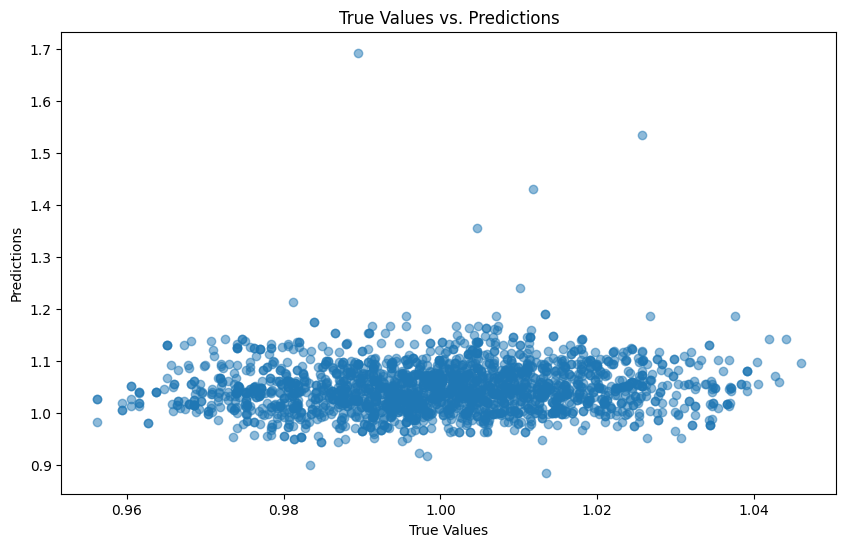

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 528us/step


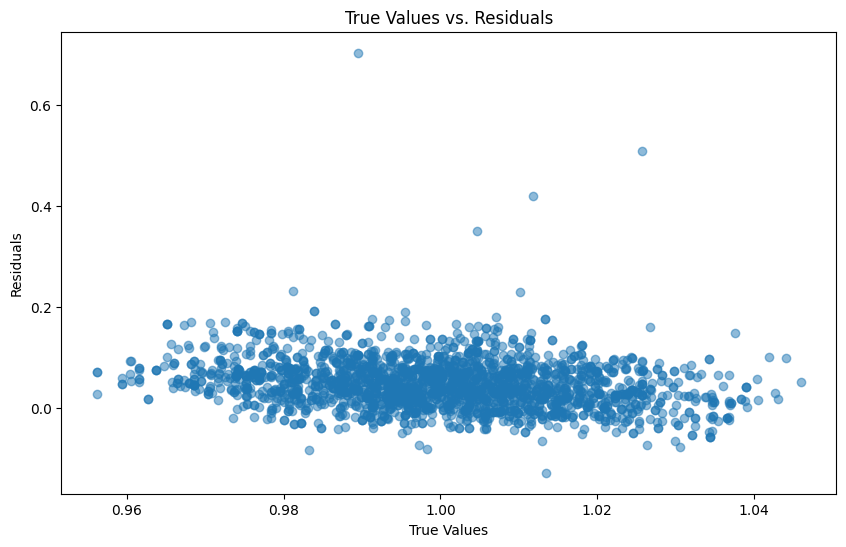

In [14]:
# Ensure submission data only contains the features used for training
x_submission_test = submission_all_bands[spectral_features]  # Keep only the 11 spectral features

# Ensure the order of features matches the training data
x_submission_test = x_submission_test[X.columns]

# Standardize the submission dataset using the same scaler
x_submission_test_scaled = scaler.transform(x_submission_test)

# Predict UHI Index
submission_predictions = best_model.predict(x_submission_test_scaled)

# Add predictions to submission DataFrame
submission_all_bands["UHI Index"] = submission_predictions.flatten()

# Plot predictions
plt.figure(figsize=(10, 6))
plt.scatter(y_test, best_model.predict(X_test), alpha=0.5)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True Values vs. Predictions')
plt.show()

# Plot residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_test, best_model.predict(X_test).flatten() - y_test, alpha=0.5)
plt.xlabel('True Values')
plt.ylabel('Residuals')
plt.title('True Values vs. Residuals')
plt.show()


In [15]:
# Load the final submission
submission_all_bands_final = submission_all_bands[['Longitude', 'Latitude', 'UHI Index']]
submission_all_bands_final.to_csv("C:\\Users\\jrzem\\Downloads\\submission_all_bands_final.csv", index=False)

The min max scaling was also very ineffective.

# Landsat and Sentinel Data:

In [18]:
landsat_sentinel_elevation = pd.read_csv("C:\\Users\\jrzem\\OneDrive\\Desktop\\EY Dataset\\Satellite Data\\landsat_sentinel_elevation.csv")

In [19]:
landsat_sentinel_elevation.columns

Index(['Longitude', 'Latitude', 'datetime', 'UHI Index', 'Thermal', 'Red',
       'Green', 'Blue', 'Near Infared', 'Building Height Only Proximity',
       'Natural Proximity', 'BO1', 'BO2', 'BO3', 'BO4', 'BO5', 'BO6', 'BO7',
       'BO8', 'B8A', 'B11', 'B12'],
      dtype='object')

In [5]:
# Load your dataset
df = landsat_sentinel_elevation.copy()

# Feature selection
X = df.drop(columns=['Longitude', 'Latitude', 'datetime', 'UHI Index'])
y = df['UHI Index']

# Train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [24]:
from tensorflow.keras.callbacks import EarlyStopping
# Define the model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),  # Input layer
    Dense(128, activation='relu'),  # Hidden layer
    Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Add EarlyStopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32,
                    validation_data=(X_test, y_test), callbacks=[early_stopping])

# Evaluate the model
model.evaluate(X_test, y_test)

Epoch 1/50
281/281 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3493 - mae: 0.4588 - val_loss: 2.6317e-04 - val_mae: 0.0131
Epoch 2/50
281/281 ━━━━━━━━━━━━━━━━━━━━ 0s 737us/step - loss: 2.6095e-04 - mae: 0.0131 - val_loss: 2.6290e-04 - val_mae: 0.0131
Epoch 3/50
281/281 ━━━━━━━━━━━━━━━━━━━━ 0s 717us/step - loss: 2.7215e-04 - mae: 0.0134 - val_loss: 2.6397e-04 - val_mae: 0.0131
Epoch 4/50
281/281 ━━━━━━━━━━━━━━━━━━━━ 0s 708us/step - loss: 2.6031e-04 - mae: 0.0131 - val_loss: 2.6386e-04 - val_mae: 0.0131
Epoch 5/50
281/281 ━━━━━━━━━━━━━━━━━━━━ 0s 734us/step - loss: 2.6370e-04 - mae: 0.0131 - val_loss: 2.6318e-04 - val_mae: 0.0131
Epoch 6/50
281/281 ━━━━━━━━━━━━━━━━━━━━ 0s 721us/step - loss: 2.6656e-04 - mae: 0.0132 - val_loss: 2.6376e-04 - val_mae: 0.0131
Epoch 7/50
281/281 ━━━━━━━━━━━━━━━━━━━━ 0s 712us/step - loss: 2.6386e-04 - mae: 0.0131 - val_loss: 2.6290e-04 - val_mae: 0.0131
Epoch 8/50
281/281 ━━━━━━━━━━━━━━━━━━━━ 0s 764us/step - loss: 2.6991e-04 - mae: 0.0133 - val_loss: 2.6313e-04 

[0.000262900663074106, 0.01306845247745514]

In [7]:
import keras_tuner as kt
def build_model(hp):
    model = Sequential()
    model.add(Dense(units=hp.Int('units', min_value=32, max_value=512, step=32),
                    activation='relu', input_shape=(X_train.shape[1],)))
    for i in range(hp.Int('num_layers', 1, 3)):
        model.add(Dense(units=hp.Int('units_' + str(i), min_value=32, max_value=512, step=32),
                        activation='relu'))
    model.add(Dense(1))  # Output layer
    
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

# Set up tuner
tuner = kt.RandomSearch(build_model,
                        objective='val_mae',
                        max_trials=10,
                        executions_per_trial=3,
                        directory='my_dir',
                        project_name='hyperparameter_tuning')

# Run the hyperparameter search
tuner.search(X_train, y_train, epochs=50, validation_data=(X_test, y_test))

# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
optimal_units = best_hps.get('units')

print(f"The optimal number of units is {optimal_units}.")

Trial 10 Complete [00h 00m 56s]
val_mae: 0.013067272181312243

Best val_mae So Far: 0.013066028555234274
Total elapsed time: 00h 09m 31s
The optimal number of units is 320.


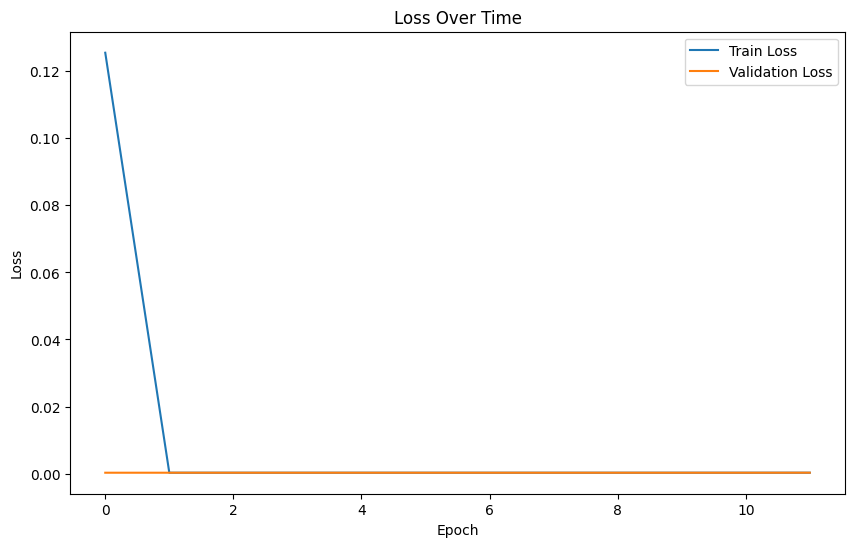

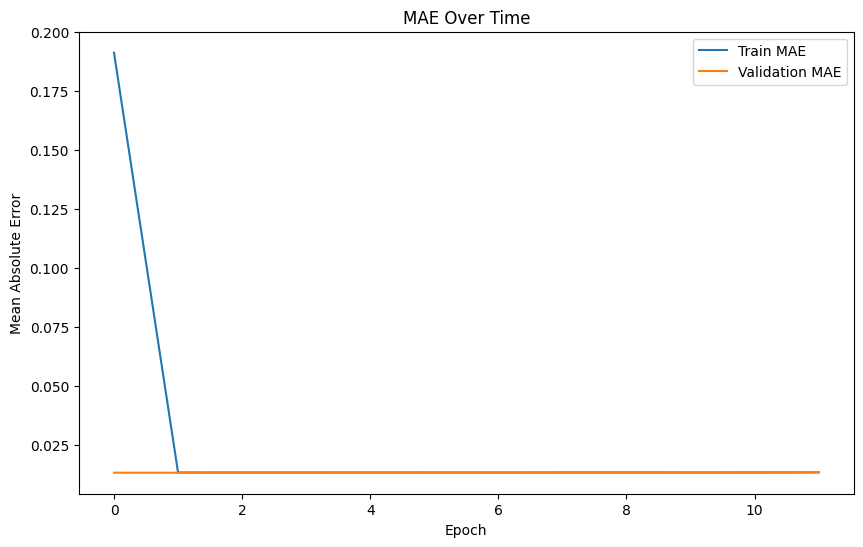

In [ ]:
# Train model with optimal hyperparameters
model = tuner.hypermodel.build(best_hps)
model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))

# Plot training loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Over Time')
plt.show()

# Plot MAE
plt.figure(figsize=(10, 6))
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.title('MAE Over Time')
plt.show()

In [10]:
def add_nearest_data(uhi_data: pd.DataFrame, data_to_map: pd.DataFrame) -> pd.DataFrame:
    """
    Adds nearest spectral data to submission dataset using KDTree.

    Parameters:
        uhi_data (pd.DataFrame): DataFrame containing submission locations (Latitude, Longitude).
        data_to_map (pd.DataFrame): DataFrame containing spectral band values.

    Returns:
        pd.DataFrame: Submission dataset with matched spectral data.
    """
    # Extract coordinates
    elevation_coords = np.array(list(zip(data_to_map["Latitude"], data_to_map["Longitude"])))
    uhi_coords = np.array(list(zip(uhi_data["Latitude"], uhi_data["Longitude"])))
    
    # Build KDTree
    tree = cKDTree(elevation_coords)
    
    # Find nearest neighbors
    _, indices = tree.query(uhi_coords)
    
    # Add matched spectral data
    uhi_data = uhi_data.copy()
    for col in data_to_map.drop(columns=['Longitude', 'Latitude']):
        uhi_data[col] = data_to_map.iloc[indices][col].values
    
    return uhi_data

# Match spectral features for submission data
submission_all_bands = add_nearest_data(test_data, landsat_sentinel_elevation)

In [11]:
# Define spectral features (excluding Longitude, Latitude, and UHI Index)
spectral_features = [col for col in X.columns if col not in ['Longitude', 'Latitude', 'datetime', 'UHI Index']]

# Ensure spectral features match between training and submission datasets
spectral_features

['Thermal',
 'Red',
 'Green',
 'Blue',
 'Near Infared',
 'Building Height Only Proximity',
 'Natural Proximity',
 'BO1',
 'BO2',
 'BO3',
 'BO4',
 'BO5',
 'BO6',
 'BO7',
 'BO8',
 'B8A',
 'B11',
 'B12']

33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 571us/step


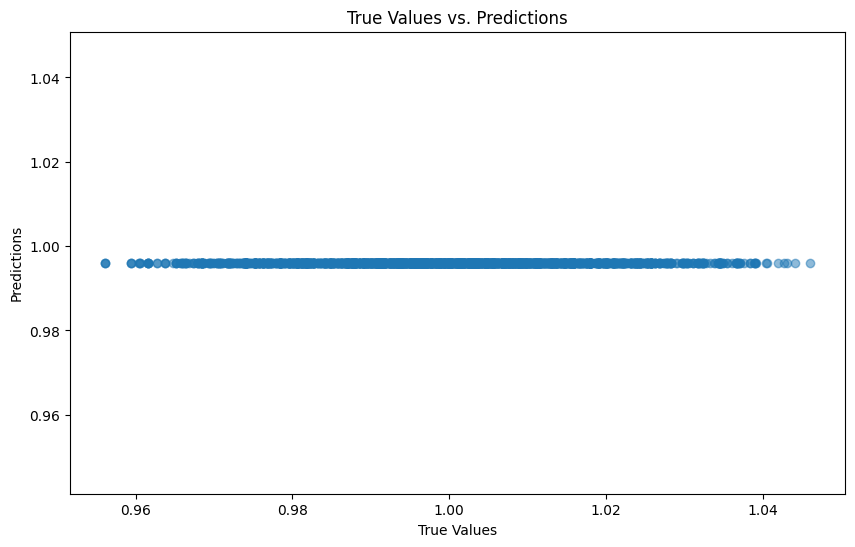

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 979us/step


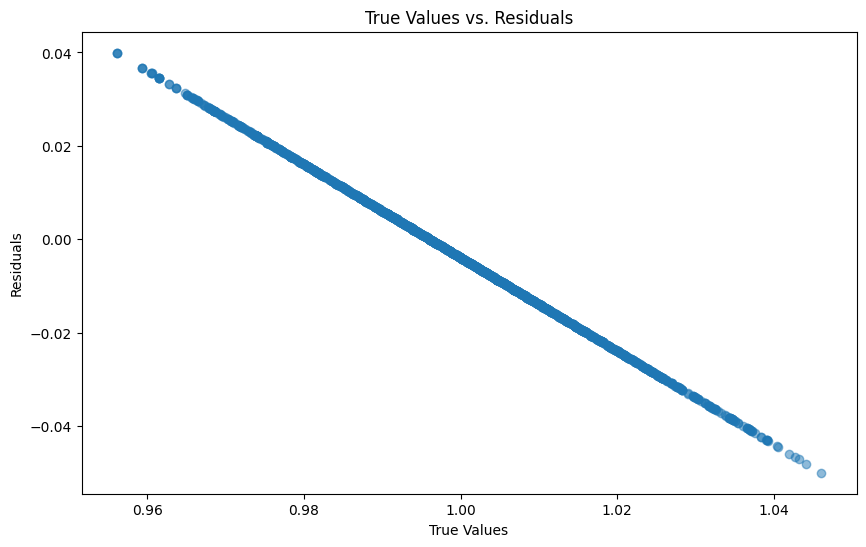

In [12]:
# Ensure submission data only contains the features used for training
x_submission_test = submission_all_bands[spectral_features]  # Keep only the 11 spectral features

# Ensure the order of features matches the training data
x_submission_test = x_submission_test[X.columns]

# Standardize the submission dataset using the same scaler
x_submission_test_scaled = scaler.transform(x_submission_test)

# Predict UHI Index
submission_predictions = best_model.predict(x_submission_test_scaled)

# Add predictions to submission DataFrame
submission_all_bands["UHI Index"] = submission_predictions.flatten()

# Plot predictions
plt.figure(figsize=(10, 6))
plt.scatter(y_test, best_model.predict(X_test), alpha=0.5)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True Values vs. Predictions')
plt.show()

# Plot residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_test, best_model.predict(X_test).flatten() - y_test, alpha=0.5)
plt.xlabel('True Values')
plt.ylabel('Residuals')
plt.title('True Values vs. Residuals')
plt.show()

In [13]:
# Load the final submission
submission_all_bands_final = submission_all_bands[['Longitude', 'Latitude', 'UHI Index']]
submission_all_bands_final.to_csv("C:\\Users\\jrzem\\Downloads\\submission_all_bands_final.csv", index=False)

# Conclusion:

The neural networks were somewhat effective, but they weren't as effective as methods that were performed using random forest regressor. We will use that in future models.